## Step 1.1 - Importing the required Libraries ##
***
  
- Pandas
- Numpy
- SciKit Learn
- Matplotlib
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rsq
from sklearn.metrics import explained_variance_score as evs
from sklearn.svm import SVR

## Step 1.2 - Data Set ##
***
- This step includes the loading of dataset into the Jupyter File Data Frame(df).
- The data is included in the CSV format. *read_csv* function of Pandas enables us to read the data.
- *head(5)* function prints the first five lines of the CSV file.

In [2]:
df = pd.read_csv('D:/Internship_ML/data.csv')
# top five rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Step 1.3 - Checking the Data Frame in detail
***
- Data Type : Different types of Data Present in the file
- Info : This function give the number of columns, Null Values, etc.
- Description : Checking the data even more in detail with different values of all columns.
- Shape : Checking the Shape of the DataFrame
- Null Values : Checking to see if the DataFrame contains any null values.

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.shape

(11914, 16)

In [7]:
df.isnull()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Step 2.1 - Removing the unwanted Columns
***
- To use as much data as we can, we should remove the unwanted columns before removing the null values.   This way the shape of the df does not change a lot.
- Here, we can see, the unwanted columns are:
  - Engine Fuel Type (dtype: string)
  - Market Category (dtype: string) 
  - Vehicle Style (dtype: string) 
  - Popularity (dtype: string)
  - Number of Doors (dtype: float)
  - Vehicle Size (dtype: string)
- All the above columns can be dropped as these values are of the type "string" or "float" but don't provide any significant value in the calculations or analysis. The dropping of these unwanted extra values definitely won't result in the changes of the final model accuracy.

In [8]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors','Vehicle Size'], axis=1) 
df.head(5) # Printing the first five rows of the dataframe to check the actions            

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Step 2.2 - Removing the null Values
***
- Now that we have all the data we need, we can remove the null values.
- This will give us the perfect DataFrame for the data analysis and preparing the ML model.

In [9]:
df = df.dropna()              # dropping the values
df.count()                    # gives the count of data with existing rows

Make                 11816
Model                11816
Year                 11816
Engine HP            11816
Engine Cylinders     11816
Transmission Type    11816
Driven_Wheels        11816
highway MPG          11816
city mpg             11816
MSRP                 11816
dtype: int64

## Step 3 - Renaming the Columns
***
The names of the colums are very lengthy and confusing which might result in wrong Data Analysis in the later stages. It is a good thing to rename the columns in the earlier stages to prevent confusion and wrong analysis further.

In [10]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5) # Printing the first 5 lines of the df to check our actions

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Step 4 - Dropping the duplicates
***
- First we check the number of duplicates present in the df.
- The data frame can possibly have duplicate values which will hamper the accuracy of our eventual ML model. At this stage it is important to drop the duplicate values from the data frame.

In [11]:
duplicate_values = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_values.shape)

number of duplicate rows:  (989, 10)


In [12]:
df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Step 5.1 - Finding and eliminating the Outliers
***
Before starting on with the Exploratory Data Analalysis, another thing which can result in the lower accuracy of the ML model is Outliers. This data does not fit in with the usual data which can cause a drastic change in the ML model results. Before constructing the model, removing the outliers is the best practice.
- Using seaborn library to plot the boxplot of the columns in the df.
- 3 columns which have the most probabilty of having oultliers are plotted on the BoxPlot.

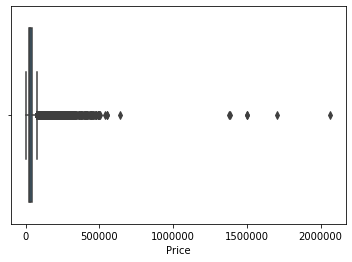

In [13]:
sns.boxplot(x=df['Price'])

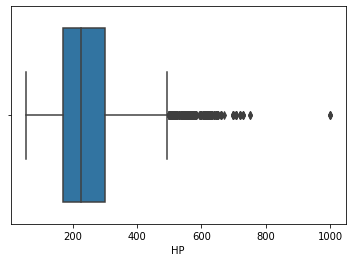

In [14]:
sns.boxplot(x=df['HP'])

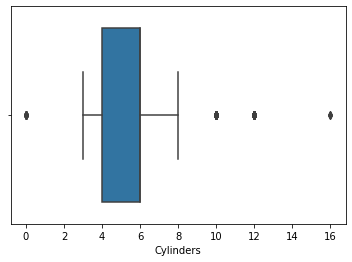

In [15]:
sns.boxplot(x=df['Cylinders'])

## Step 5.2 - Interquartile Range Score
***
We now need to eliminate the Outliers. We will do this by performing the IQR Score technique. This technique helps in removing the outliers. Basically, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the above data.

In [16]:
Quarter1 = df.quantile(0.25)
Quarter3 = df.quantile(0.75)
InterQuartileRange = Quarter3 - Quarter1
print(InterQuartileRange)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21215.0
dtype: float64


In [17]:
df = df[~((df < (Quarter1 - 1.5 * InterQuartileRange)) |(df > (Quarter3 + 1.5 * InterQuartileRange))).any(axis=1)]
df.shape

(9852, 10)

## Step 6.1 - Finding the top car brands
***
Here, we will now find the top 10 car brands which occur in the dataset more number of times i.e. the top 10 most represented car brands.

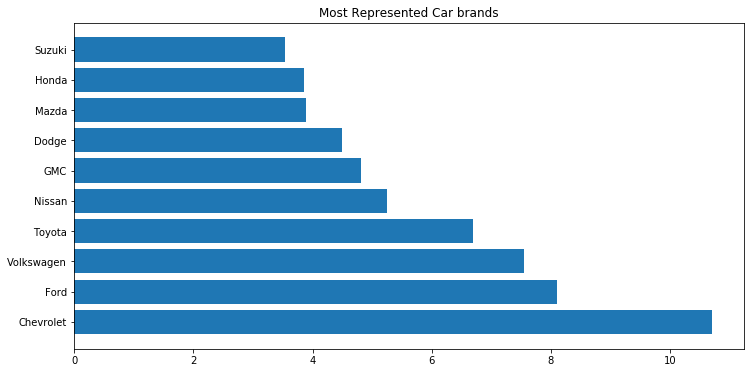

In [18]:
all_brands = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
top_brands = all_brands.index[:10]
    
# Plot
plt.figure(figsize=(12,6))
plt.barh(top_brands, width=all_brands[:10])
plt.title('Most Represented Car brands')
plt.show()

## Step 6.2 - Finding the average
***
We have found the top brands. Now we can find the average of the prices of the cars of the above brands.

In [19]:
average = df[['Make','Price']].loc[
               (df['Make'] == 'Suzuki')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Chevrolet') ].groupby('Make').mean()
print(average)

                   Price
Make                    
Chevrolet   27591.962049
Dodge       25983.345372
Ford        27774.842105
GMC         32866.520000
Honda       27511.286842
Mazda       20366.657963
Nissan      28148.655706
Suzuki      18044.339080
Toyota      29223.393020
Volkswagen  28339.133244


## Step 7 - Plotting the correlation matrix
***


In [20]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.343289,-0.120649,0.359724,0.325107,0.620155
HP,0.343289,1.000000,0.717709,-0.456587,-0.549730,0.736556
Cylinders,-0.120649,0.717709,1.000000,-0.714698,-0.762271,0.347323
MPG-H,0.359724,-0.456587,-0.714698,1.000000,0.940891,-0.105704
MPG-C,0.325107,-0.549730,-0.762271,0.940891,1.000000,-0.173772
Price,0.620155,0.736556,0.347323,-0.105704,-0.173772,1.000000


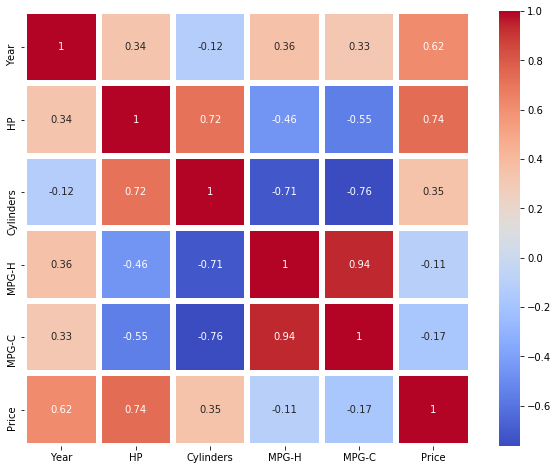

In [21]:
correlation_data = df.corr()
visual_plot = correlation_data.index
plt.figure(figsize=(10,8))
graph = sns.heatmap(df[visual_plot].corr(), annot=True, cmap='coolwarm',linewidths=5)

## Step 7 Observation
***
We have plotted the correlation matrix and also its heatmap using the Pandas and Seaborn library. Using the heatmap and following observations can be made:
- HP has had a gradual yet weak uphill graph along the years. 
- Cylinders of the Car have affected the Mileage of the car drastically. The negative values of the MPG-C and MPG-H with cylinder shows a steep downhill graph for the values.
- The values of MPG-H and MPG-C have a very good uphill climb. That shows the Highway and City mileages have a very good correlation.
- The values of car price to year and or HP have a weak uphill value which shows the prices are weakly dependent on the HP and slowly increase along with time.
- Mileages of Highway and City have certainly dropped along price. The weak downhill value points show how the prices affect MPG-H and MPG-C.
- Overall the graph tends toward the negative side, which means a negative impact on the cars.

## Step 8 - Exploratory Data Analysis
***
Plotting different graphs and taking notes for each graph.
1. Popularity on Price of the car.
2. Engine HP on the Price of the car.
3. Highway MPG with Price of the car.
4. Price of the car and Transmission

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

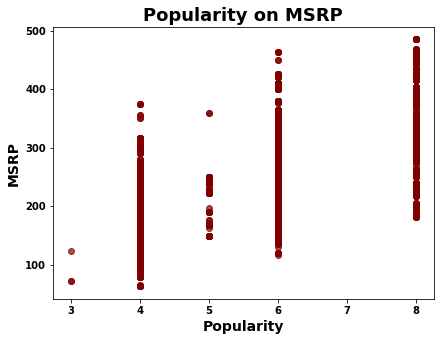

In [22]:
plt.figure(figsize=(15,5))

graph = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=df['Cylinders'], y=df['HP'], color='maroon', alpha=0.7)
plt.title('Popularity on MSRP', weight='bold', fontsize=18)
plt.xlabel('Popularity', weight='bold',fontsize=14)
plt.ylabel('MSRP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

## Graph 1 Observations
***
The above graph clearly explains the Correlation between MSRP and Popularity.

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]),
 <a list of 10 Text yticklabel objects>)

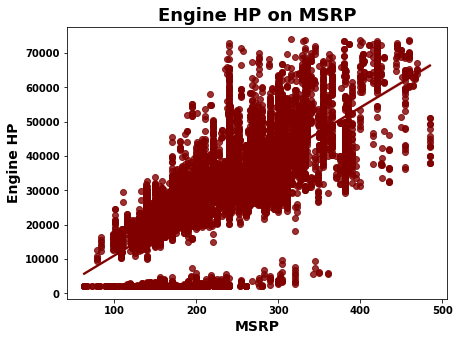

In [23]:
plt.figure(figsize=(15,5))

graph = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=df['HP'], y=df['Price'], color='maroon')
plt.title('Engine HP on MSRP', weight='bold', fontsize=18)
plt.xlabel('MSRP', weight='bold',fontsize=14)
plt.ylabel('Engine HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

## Graph 2 Observations
***
The graph plotted with HP against Price clearly indicates that the Engine HP increases with the increase in Price of the car. Correlation of HP with Price is very good with values closer to positive 1.

(array([10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 8 Text yticklabel objects>)

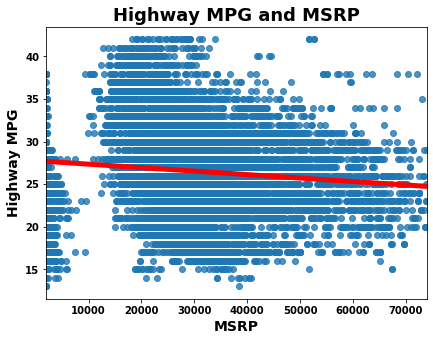

In [24]:
plt.figure(figsize=(15,5))

graph = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=df["Price"], y=df["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Highway MPG and MSRP', weight='bold', fontsize=18)
plt.xlabel('MSRP', weight='bold',fontsize=14)
plt.ylabel('Highway MPG', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

## Graph 3 Observations
***
The above graph shows how the Highway Mileage decrease with the increase in the Car price. This is because the Engine HP increases with Price and thus the consumption of fuel increases. This leads to a lesser mileage of the car.


(array([10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 8 Text yticklabel objects>)

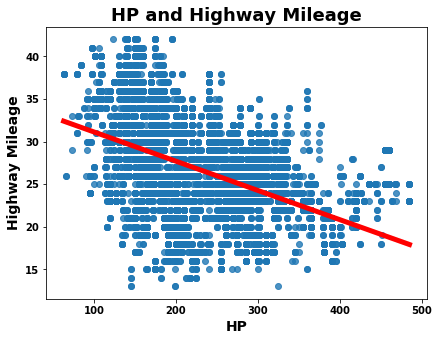

In [25]:
plt.figure(figsize=(15,5))

graph = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=df["HP"], y=df["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('HP and Highway Mileage', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('Highway Mileage', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

## Graph 4 Observation
***
The above graph is a representation of values of HP to Highway Mileage. As we can clearly see, the Highway Mileage of the car linearly decreases along the increasing HP. As the HP increases, the fuel consumption of the increases and this reults in the decreas of the mileage of the car. 

## Step 9 - Building a Data Model to predict Car Prices
***

In [26]:
df = pd.get_dummies(df, drop_first=True)
print(df.columns)

Index(['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price', 'Make_Alfa Romeo',
       'Make_Audi', 'Make_BMW', 'Make_Buick',
       ...
       'Model_tC', 'Model_xA', 'Model_xB', 'Model_xD',
       'Transmission_AUTOMATIC', 'Transmission_MANUAL', 'Transmission_UNKNOWN',
       'Drive Mode_four wheel drive', 'Drive Mode_front wheel drive',
       'Drive Mode_rear wheel drive'],
      dtype='object', length=735)


In [27]:
X_head = df.iloc[:, df.columns != 'Price'] # Selecting every column except the price column 
X = df.loc[:, df.columns != 'Price']
y = df['Price'] # Selecting the price column 

## Step 10 - Choosing Different Algorithms
****
Splitting the dataset into 80% train data and 20% test data!

Accuracy of the model :  0.9424460563583219
Mean Absolute Error :  2535.623826012008
R Square Regression Score :  0.9424460563583219
Mean Squared Error :  13308617.865449578
Root Mean Squared Error :  3648.0978420883366
Explained variance regression score :  0.9424513467864022


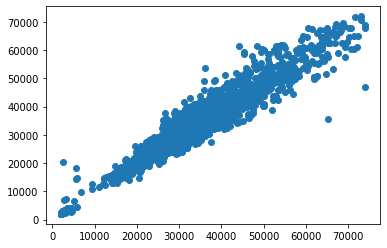

In [28]:
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test) # Testing the model over TestData
rms = (mse(y_test, pred) ** 0.5) # Root Mean Square Value

print("Accuracy of the model : ", model.score(X_test, y_test))
print("Mean Absolute Error : ", mae(y_test, pred))
print("R Square Regression Score : ", rsq(y_test, pred))
print("Mean Squared Error : ", mse(y_test, pred))
print("Root Mean Squared Error : ", rms)
print("Explained variance regression score : ", evs(y_test, pred))
plt.scatter(y_test, pred)

## Step 10.1 - Random Forest Regression - Observations
****
- As we can see above, the RandomForest Regression algorithm gave us a prediction accuracy as good as 94.2 % for the data model with Price as the target variable.
- The Mean Price of the cars was 30329 Dollars according to the built model. 
- The Mean Absolute Error for the model came upto 2535.6 Dollars
- The Root Mean Square Error of the model indicates a good fit of the model over the data.
- The Explained Variance Score value can be interpreted as very good due to a high percentage value. 

Accuracy of the model :  0.9999999998782142
Mean Absolute Error :  0.006152525674752308
R Square Regression Score :  0.9999999998782142
Mean Squared Error :  0.027888548000236248
Root Mean Squared Error :  0.16699864670181086
Explained variance regression score :  0.9999999998783795


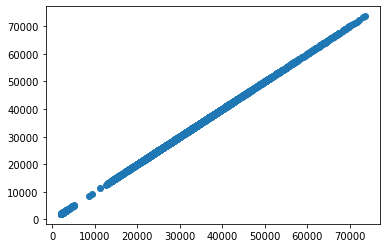

In [29]:
X_scaled = MinMaxScaler().fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
rms = (mse(y_test, pred) ** 0.5)

print("Accuracy of the model : ", model.score(X_test, y_test))
print("Mean Absolute Error : ", mae(y_test, pred))
print("R Square Regression Score : ", rsq(y_test, pred))
print("Mean Squared Error : ", mse(y_test, pred))
print("Root Mean Squared Error : ", rms)
print("Explained variance regression score : ", evs(y_test, pred))
plt.scatter(y_test, pred)

## Step 10.2 - Linear Regression - Observations
****
- As we can see above, the Linear Regression algorithm gave us a prediction accuracy as good as 99 % for the data model with Price as the target variable.
- The Mean Absolute Error for the model came upto 0.006 Dollars
- The Root Mean Square Error of the model indicates a very good fit of the model over the data.
- The Explained Variance Score value can be interpreted as very good as the value is extremely close to 1. 

Accuracy of the model :  0.050735667174023336
Mean Absolute Error :  5616.3115169964485
R Square Regression Score :  0.6879443628737049
Mean Squared Error :  71459688.22628108
Root Mean Squared Error :  8453.383241417669
Explained variance regression score :  0.7084131932293518


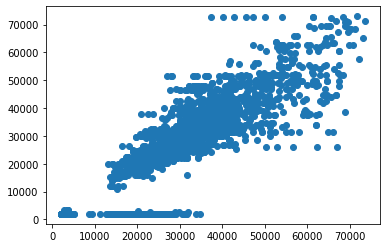

In [30]:
X_scaled = MinMaxScaler().fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
rms = (mse(y_test, pred) ** 0.5)

print("Accuracy of the model : ", model.score(X_test, y_test))
print("Mean Absolute Error : ", mae(y_test, pred))
print("R Square Regression Score : ", rsq(y_test, pred))
print("Mean Squared Error : ", mse(y_test, pred))
print("Root Mean Squared Error : ", rms)
print("Explained variance regression score : ", evs(y_test, pred))
plt.scatter(y_test, pred)

## Step 10.3 - Logistic Regression - Observations
***
The Logistic regression model gave a very weak accuracy score with the model.
- The R Square value which closely represents the accuracy is about 70 %
- The Mean Absolute Error is fairly close to RandomForest Error but still the error margin is huge.
- Root Mean Square Error for Logistic Regression is also very big which suggests a very weak fitting of the regression model over the data.
- Explained Variance regression is moderate with a 70% value.

Accuracy of the model :  0.009235324700963665
Mean Absolute Error :  11509.404532315562
R Square Regression Score :  0.009235324700963665
Mean Squared Error :  226881768.4387085
Root Mean Squared Error :  15062.595010113911
Explained variance regression score :  0.019462886320011474


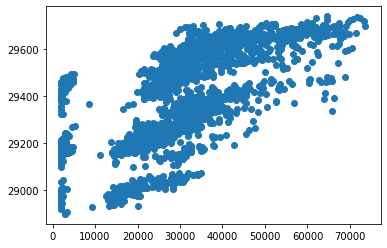

In [31]:
X_scaled = MinMaxScaler().fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=100)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
pred = model.predict(X_test)
rms = (mse(y_test, pred) ** 0.5)

print("Accuracy of the model : ", model.score(X_test, y_test))
print("Mean Absolute Error : ", mae(y_test, pred))
print("R Square Regression Score : ", rsq(y_test, pred))
print("Mean Squared Error : ", mse(y_test, pred))
print("Root Mean Squared Error : ", rms)
print("Explained variance regression score : ", evs(y_test, pred))
plt.scatter(y_test, pred)

## Step 10.4 - Support Vector Regression
***
- This regression algorithm was the weakest considering the other algorithms.
- The R Square Score of the model was not good.
